### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

#### Data Description:
 
#### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

#### ID --Unique ID

#### Balance--Number of miles eligible for award travel

#### Qual_mile--Number of miles counted as qualifying for Topflight status

#### cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
#### cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#### cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

#### 1 = under 5,000
#### 2 = 5,000 - 10,000
#### 3 = 10,001 - 25,000
#### 4 = 25,001 - 50,000
#### 5 = over 50,000

#### Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

#### Bonus_trans--Number of non-flight bonus transactions in the past 12 months

#### Flight_miles_12mo--Number of flight miles in the past 12 months

#### Flight_trans_12--Number of flight transactions in the past 12 months

#### Days_since_enrolled--Number of days since enrolled in flier program

#### Award--whether that person had award flight (free flight) or not


 

In [1]:
#Hierarchical Clustering

In [2]:
import pandas as pd 
import numpy as np 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [3]:
airlines_data = pd.read_csv("EastWestAirlines.csv")
airlines_data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### Heiarchical Clustering

In [5]:
airlines_data=airlines_data.drop(['ID'],axis=1)
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
#Normalization
from sklearn.preprocessing import normalize

In [7]:
#Normalize Dataframe
df_norm = pd.DataFrame(normalize(airlines_data),columns=airlines_data.columns)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


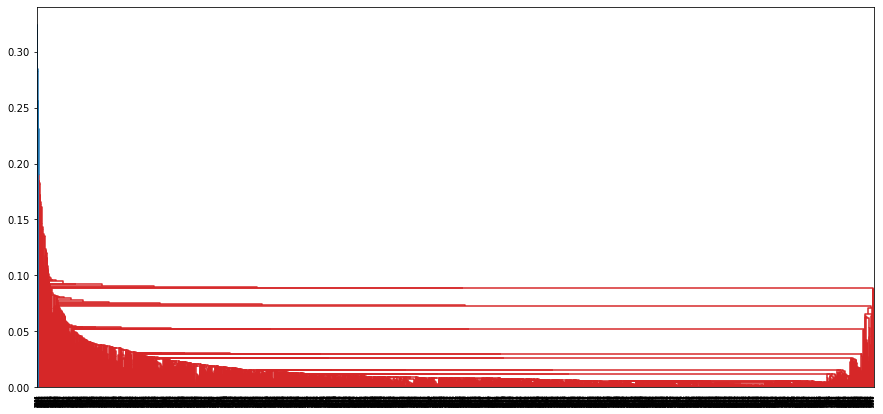

In [8]:
#Create Dendogram
fig = plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(df_norm,method='single'))

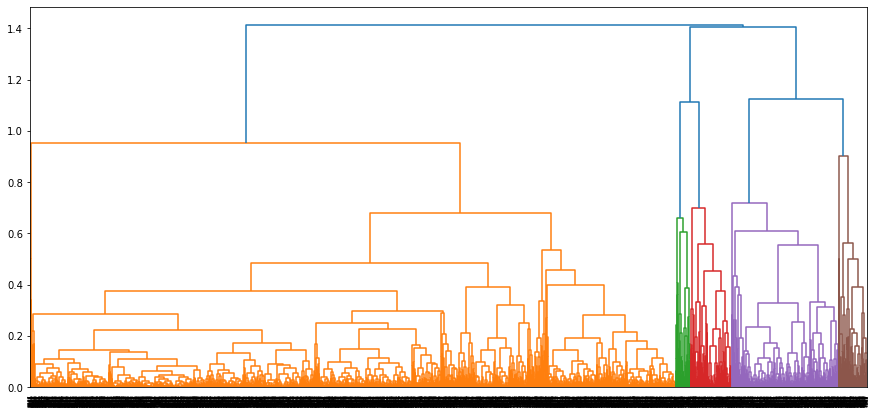

In [9]:
fig = plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))

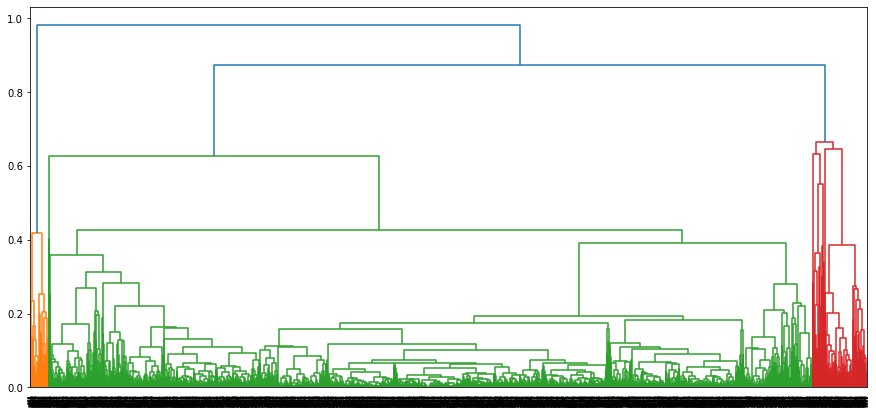

In [10]:
fig = plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(df_norm,method='average'))

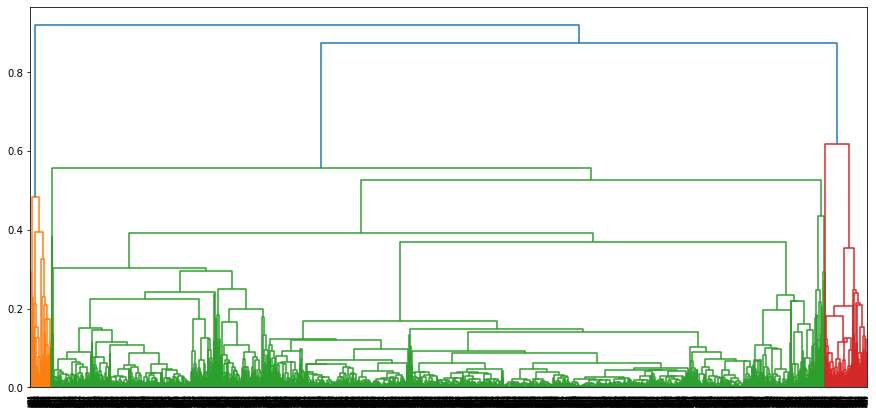

In [11]:
fig = plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [12]:
#create clusters
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage="complete")

In [13]:
#save cluster for chart
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['h_clusters'])
clusters

,h_clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [14]:
airlines_data['h_clusterid'] = clusters
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
y=pd.DataFrame(hc.fit_predict(df_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    3086
1     509
3     197
2     137
4      70
Name: clustersid, dtype: int64

In [16]:
# Adding clusters to dataset
airlines_data['h_clusterid']=hc.labels_
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
airlines_data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836,0.301685
1,1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
3,3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429


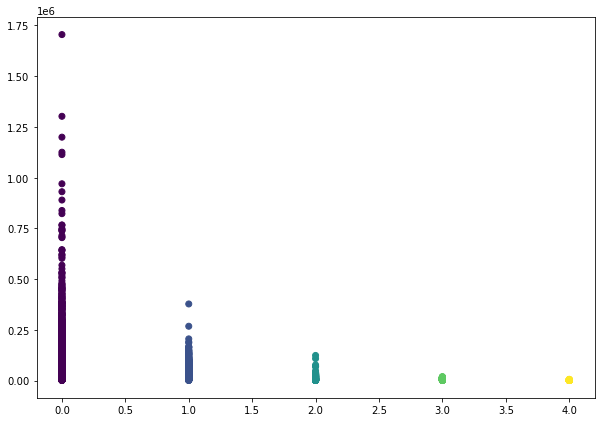

In [18]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['h_clusterid'],airlines_data['Balance'], c=hc.labels_) 

### KMeans

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
import seaborn as sns

In [20]:
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
#Normalise function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(airlines_data.iloc[:,0:])
df_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -4.57676236e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -4.57676236e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -4.57676236e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.57676236e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -4.57676236e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -4.57676236e-01]])

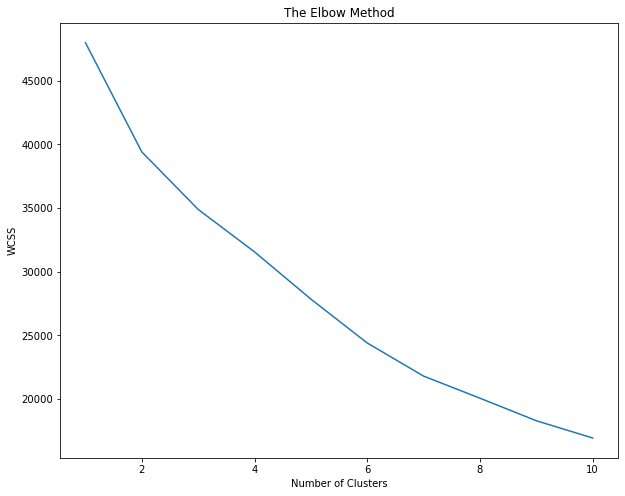

In [22]:
#Elbow Chart
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [23]:
# selecting 6 clusters from above scree plot
model=KMeans(n_clusters=6)
model.fit(df_norm)
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
x=pd.Series(model.labels_)
airlines_data['k_Clusterid']=x
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_Clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [26]:
airlines_data.iloc[:,0:11].groupby(airlines_data.k_Clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_Clusterid,,,,,,,,,,,
0,47665.735961,34.098272,1.331533,1.018359,1.000540,5224.250000,7.710043,162.286717,0.492441,3484.794276,0.000000
1,126383.097876,58.979686,3.875346,1.001847,1.001847,42793.977839,19.274238,367.046168,1.092336,4971.421053,0.645429
2,38337.310875,70.212766,1.273050,1.018913,1.000000,6132.358156,7.060284,301.355792,0.942080,4325.013002,0.741135
3,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508,0.542373
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,192745.416667,468.291667,2.250000,1.041667,1.000000,33469.729167,28.631944,5709.500000,16.715278,4690.604167,0.798611


In [27]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_norm)
y_kmeans = kmeans.predict(df_norm)

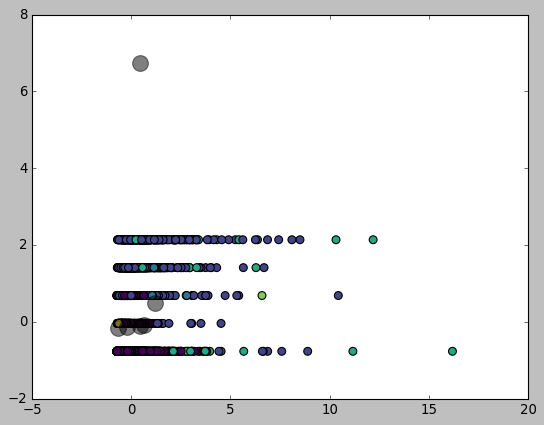

In [29]:
plt.scatter(df_norm[:,0:1],df_norm[:,2:3],c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [31]:
df_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -4.57676236e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -4.57676236e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -4.57676236e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.57676236e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -4.57676236e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -4.57676236e-01]])

In [32]:
dbscan=DBSCAN(eps=2,min_samples=6)
dbscan.fit(df_norm)

DBSCAN(eps=2, min_samples=6)

In [33]:
#Noisy samples are given the label -1.
dbscan.labels_
max(dbscan.labels_)

6

In [34]:
# Adding clusters to dataset
airlines_data['db_clusters']=dbscan.labels_
airlines_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_Clusterid,db_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [35]:
airlines_data.groupby('db_clusters').agg(['mean']).reset_index()

,db_clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_Clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,234804.285714,1458.242857,2.852381,1.085714,1.233333,52585.580952,26.995238,3711.009524,10.680952,4879.923810,0.804762,0.409524,3.509524
1,0,63104.831163,46.923215,1.767400,1.000000,1.000000,10725.057027,9.549618,203.732824,0.601706,3729.907050,0.000000,0.058824,0.216884
2,1,77770.532159,95.689893,2.637825,1.000000,1.000000,25366.506891,14.121746,451.517611,1.420368,4568.574273,1.000000,0.548239,1.565084
3,2,5542.922374,6.872146,1.000000,1.000000,1.000000,683.885845,2.589041,49.036530,0.146119,4715.132420,0.000000,3.264840,2.000000
4,3,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000,0.125000,0.000000
5,4,45396.500000,0.000000,1.000000,2.000000,1.000000,8501.666667,14.333333,125.000000,0.500000,5105.000000,1.000000,0.333333,2.000000
6,5,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000,0.222222,0.000000
7,6,57732.666667,6518.166667,1.000000,1.000000,1.000000,3007.333333,3.166667,302.833333,0.833333,3403.333333,0.000000,0.000000,3.000000


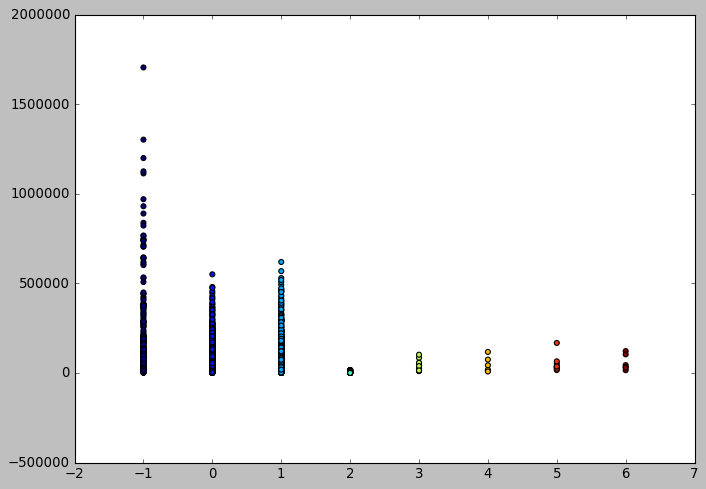

In [36]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Balance'], c=dbscan.labels_) 

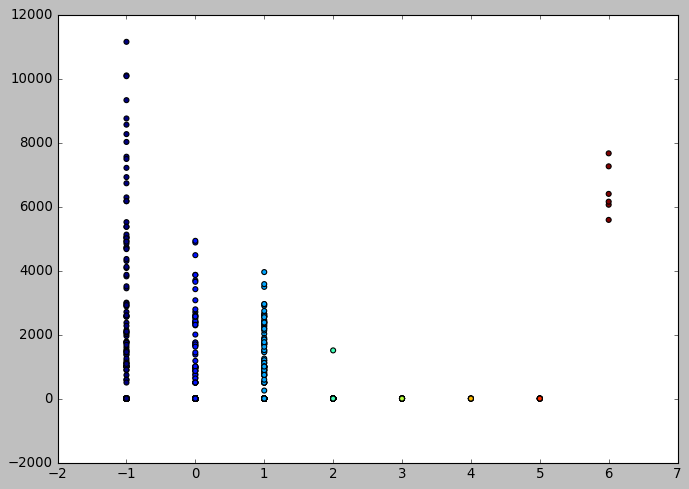

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Qual_miles'], c=dbscan.labels_) 

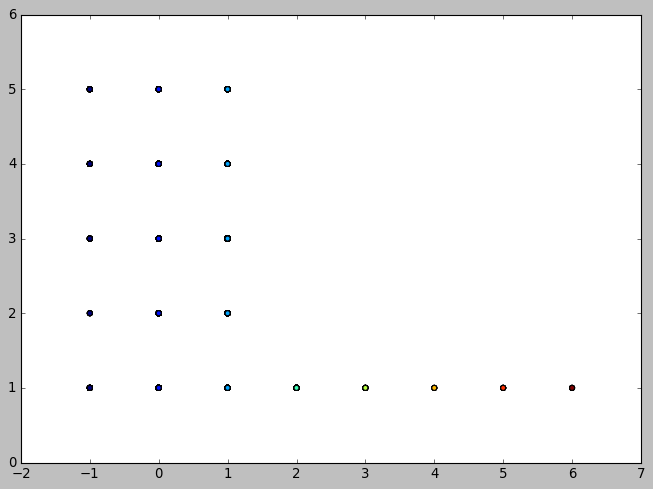

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['cc1_miles'], c=dbscan.labels_) 

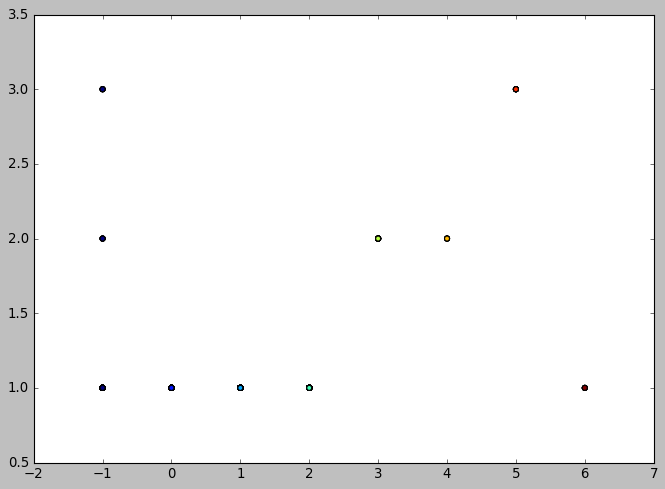

In [39]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['cc2_miles'], c=dbscan.labels_) 

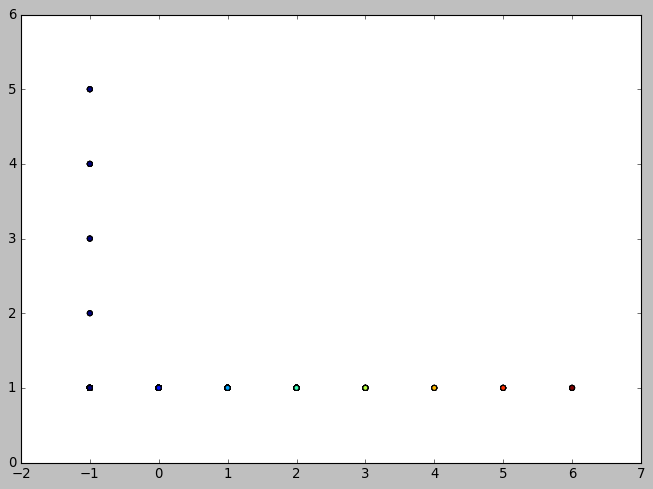

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['cc3_miles'], c=dbscan.labels_) 

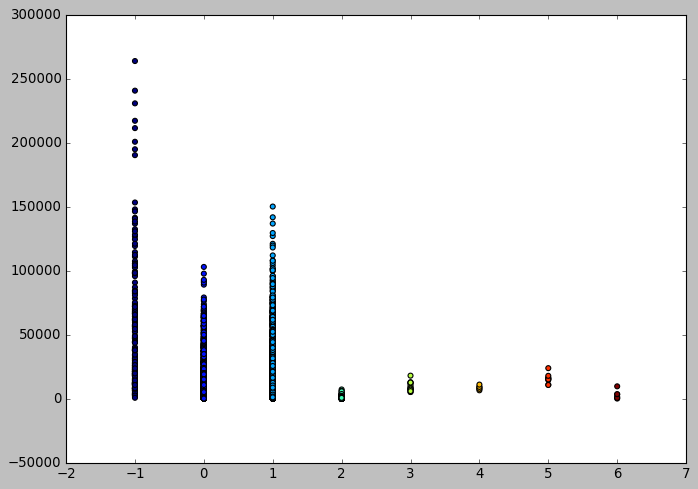

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Bonus_miles'], c=dbscan.labels_) 

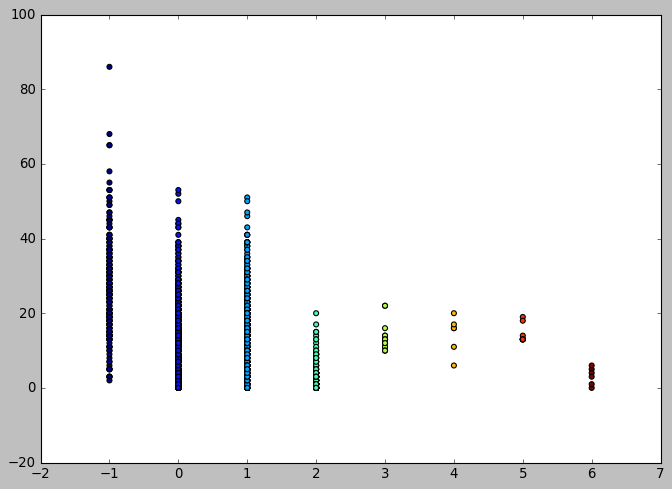

In [42]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Bonus_trans'], c=dbscan.labels_) 

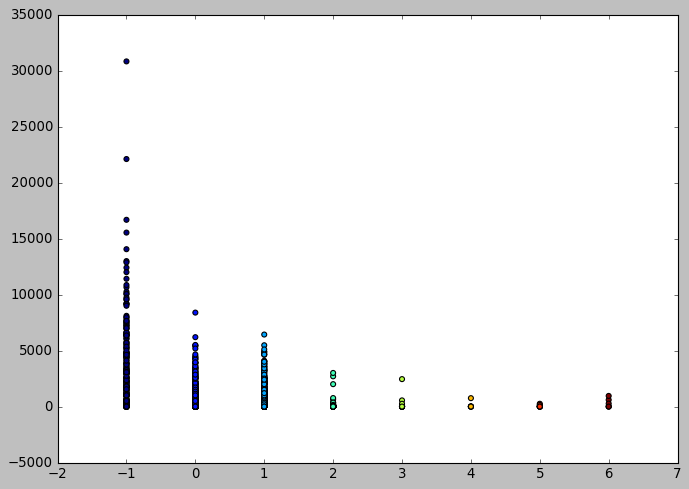

In [43]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Flight_miles_12mo'], c=dbscan.labels_) 

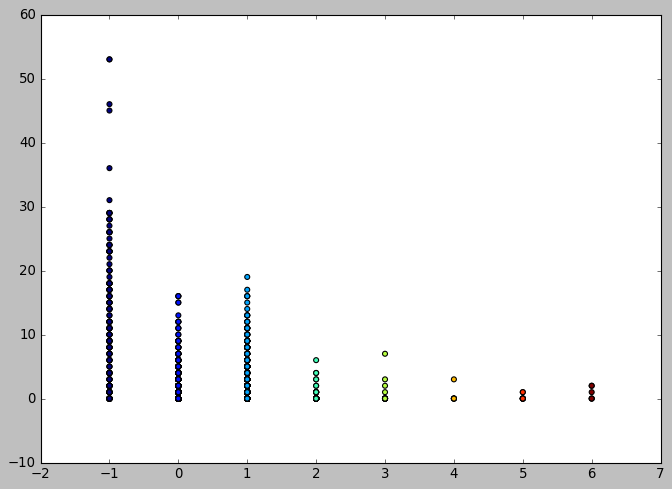

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_data['db_clusters'],airlines_data['Flight_trans_12'], c=dbscan.labels_) 